In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.datasets import mnist

2025-10-12 13:23:02.342448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760275382.521892      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760275382.573069      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<h1>NORMALIZE THE PIXEL VALUES FROM 0 TO 1 ONLY
AS CURRENTLY IT HAVE VALUES FROM 1 TO 255
</h1>

In [5]:
x_train=x_train/255
x_test=x_test/255


<h1>as cnn expect 4 d tensor so making ready x_train and x_test for it</h1>

In [6]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

<h1>now handling categorical using one hot
iske baad y_train me hr ek number ke liye array hoga
jisme hrr number ke hone ki probablity
store hogi and max will be selected</h1>

In [7]:
from tensorflow.keras.utils import to_categorical
print(y_train.shape)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)

(60000,)
(60000, 10)


In [8]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1760275395.618711      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [9]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
# detectiung gpu supporting or not


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
# from datetime import datetime
# now=datetime.now()
# print(now)
# history=model.fit(x_train,y_train,epochs=10,validation_split=0.1)
# now=datetime.now()
# print(now)

In [11]:
from datetime import datetime
now=datetime.now()
print(now)
history=model.fit(x_train,y_train,epochs=10,validation_split=0.1)
now=datetime.now()
print(now)

2025-10-12 13:23:16.859004
Epoch 1/10


I0000 00:00:1760275399.418941      60 service.cc:148] XLA service 0x7a382400b2b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760275399.419355      60 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760275399.678279      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


  64/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3492 - loss: 1.8795

I0000 00:00:1760275401.695687      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8557 - loss: 0.4545 - val_accuracy: 0.9857 - val_loss: 0.0496
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9759 - loss: 0.0792 - val_accuracy: 0.9905 - val_loss: 0.0343
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9824 - loss: 0.0574 - val_accuracy: 0.9920 - val_loss: 0.0321
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0440 - val_accuracy: 0.9915 - val_loss: 0.0327
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9880 - loss: 0.0392 - val_accuracy: 0.9923 - val_loss: 0.0300
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9917 - val_loss: 0.0312
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9922 - val_loss: 0.0341
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accura

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0338
Test Accuracy: 0.9925000071525574


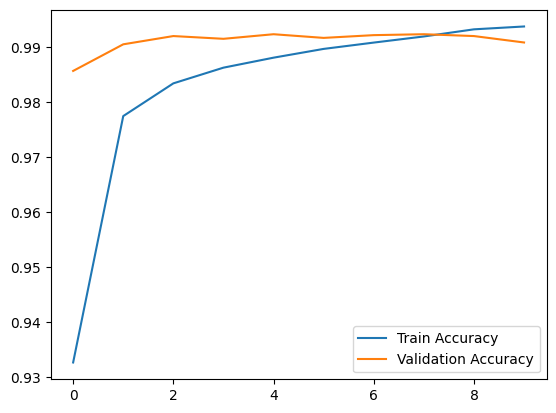

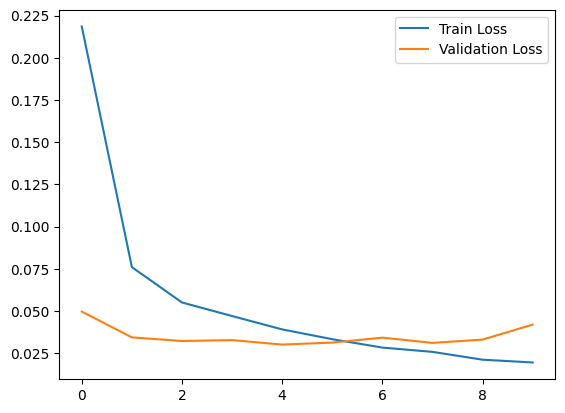

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [14]:
predictions = model.predict(x_test)
print("Predicted digit for first image:", predictions[5].argmax())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted digit for first image: 1


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


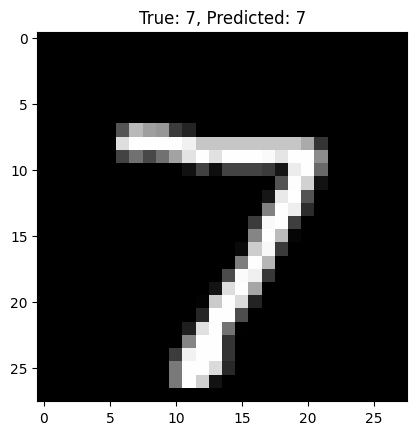

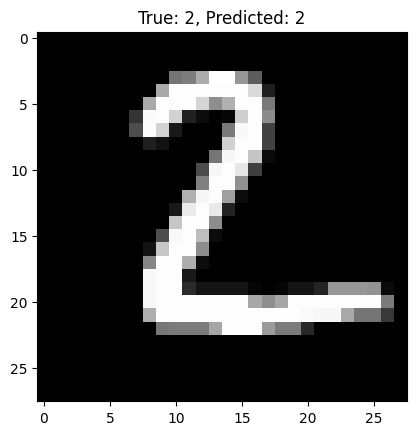

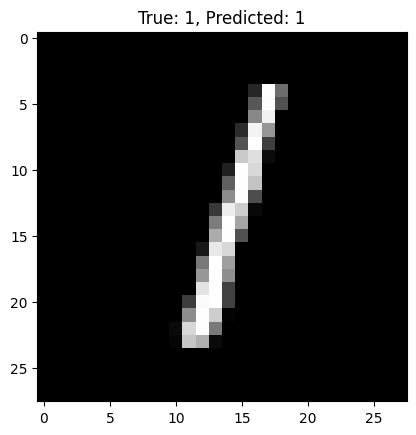

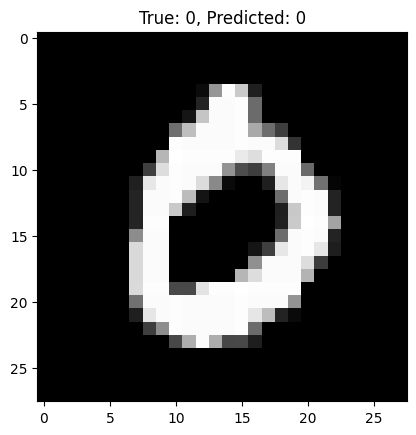

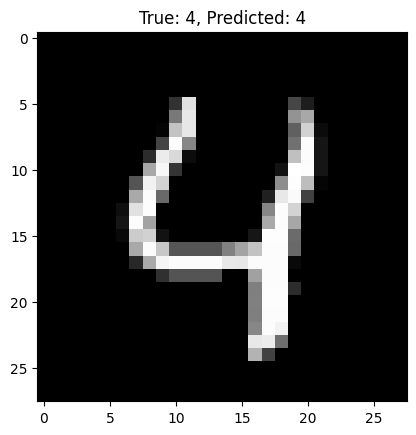

In [15]:
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i].argmax()}, Predicted: {predictions[i].argmax()}")
    plt.show()


In [16]:
model.save("mnist_cnn_model.h5")
